In [5]:
from typing import TypedDict, Literal
from IPython.display import display
import graphviz
class PortfolioState(TypedDict):
    amount_usd : float
    total_usd : float
    total : float
    target_currency: Literal["INR", "EUR"] 

def choose_conversion(state : PortfolioState) -> str:
    return state["target_currency"]

In [4]:
def calc_total(state: PortfolioState) -> PortfolioState:
    state["total_usd"] = state["amount_usd"] * 1.08
    return state

def convert_to_inr(state: PortfolioState) -> PortfolioState:
    state["total"] = state["total_usd"] * 85
    return state

def convert_to_euro(state: PortfolioState) -> PortfolioState:
    state["total"] = state["total_usd"] * 0.9
    return state

In [6]:
from langgraph.graph import StateGraph, START, END

builder = StateGraph(PortfolioState)
builder.add_node("calc_total_node", calc_total)
builder.add_node("convert_to_inr_node", convert_to_inr)
builder.add_node("convert_to_euro_node", convert_to_euro)

builder.add_edge(START, "calc_total_node")
builder.add_conditional_edges(
    "calc_total_node",
    choose_conversion,
     {
         "INR" : "convert_to_inr_node",
         "EUR" : "convert_to_euro_node"
     } 
    )
builder.add_edge(["convert_to_inr_node", "convert_to_euro_node"], END)

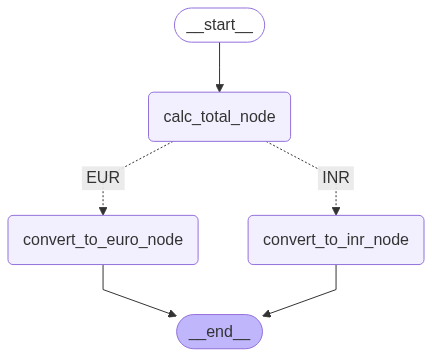

In [8]:
graph = builder.compile()

from IPython.display import Image, display
display(Image(graph.get_graph().draw_mermaid_png()))